In [1]:
import numpy as np
import pandas as pd

In [2]:
import pandas as pd
encodings=['utf-8','latin1','ISO-8859-1','cp1252']
file_path='spam.csv'
for encoding in encodings:
    try:
        df=pd.read_csv(file_path,encoding=encoding)
        print(f"File successfully read with encoding:{encoding}")
        break
    except UnicodeDecodeError:
        print("Failed to read with encoding")
        continue
if 'df' in locals():
    print("CSV file has been succesfully loaded.")
else:
    print("All encoding attempts failed. Unable to read CSV file.")
    

Failed to read with encoding
File successfully read with encoding:latin1
CSV file has been succesfully loaded.


In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4662,ham,No. Yes please. Been swimming?,NaN,NaN,NaN
4513,ham,"Sure, whenever you show the fuck up &gt;:(",NaN,NaN,NaN
3414,ham,He remains a bro amongst bros,NaN,NaN,NaN
247,ham,Kallis wont bat in 2nd innings.,NaN,NaN,NaN
400,spam,FREE RINGTONE text FIRST to 87131 for a poly o...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
#data cleaning
#EDA
#text preprocessing
#model building 
#evaluation 
#Improvement
#website
#deploy

In [6]:
# DATA CLEANING 

In [7]:
#______________________________________________________________

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)

In [10]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [11]:
df.sample(10)

,v1,v2
168,ham,Great escape. I fancy the bridge but needs her...
4332,ham,Y bishan lei... I tot Ì_ say lavender?
1328,ham,My exam is for february 4. Wish you a great day.
3685,ham,I get out of class in bsn in like &lt;#&gt; ...
1023,ham,May i call You later Pls
5520,ham,No. I dont want to hear anything
427,ham,Any pain on urination any thing else?
4661,ham,Ladies first and genus second k .
1269,ham,"Tee hee. Off to lecture, cheery bye bye."
835,ham,Good Morning my Dear........... Have a great &...


In [12]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
2744,ham,"Tick, tick, tick ... Babe"
3913,ham,Today is ACCEPT DAY..U Accept me as? Brother S...
1600,ham,K.then any other special?
4454,ham,"Storming msg: Wen u lift d phne, u say \HELLO\..."
4567,ham,hiya hows it going in sunny africa? hope u r a...


In [13]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [14]:
df['target']=encoder.fit_transform(df['target'])

In [15]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [17]:
df.duplicated().sum()

403

In [18]:
df=df.drop_duplicates(keep='first')

In [19]:
df.duplicated().sum()

0

In [20]:
df.shape

(5169, 2)

In [21]:
#EDA
#_____________________________________________________

In [22]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [23]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

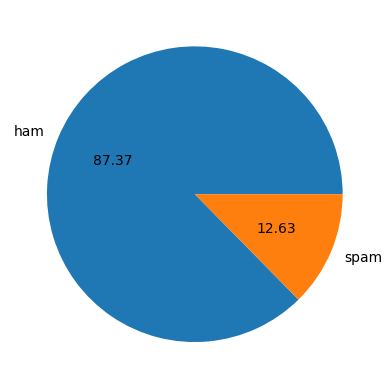

In [24]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [25]:
!pip install nltk

In [26]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [27]:
import nltk

In [28]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\owner's\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [29]:
df['num_characters']=df['text'].apply(len)

C:\Users\owner's\AppData\Local\Temp\ipykernel_9928\399031894.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters']=df['text'].apply(len)


In [30]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [31]:
df.sample(5)

,target,text,num_characters
286,0,Ok..,4
889,0,Wife.how she knew the time of murder exactly,44
4625,0,Lol ... I knew that .... I saw him in the doll...,54
1989,0,The basket's gettin full so I might be by tonight,49
1203,0,Thanks for understanding. I've been trying to ...,61


In [32]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))#words count

C:\Users\owner's\AppData\Local\Temp\ipykernel_9928\3095043411.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))#words count


In [33]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [34]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))#words count

C:\Users\owner's\AppData\Local\Temp\ipykernel_9928\2714444095.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))#words count


In [35]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [36]:
df[["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [37]:
df[df['target']==0][["num_characters","num_words","num_sentences"]].describe()#NOT SPAM

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [38]:
df[df['target']==1][["num_characters","num_words","num_sentences"]].describe()#SPAM

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [39]:
import seaborn as sns

<Axes: xlabel='num_sentences', ylabel='Count'>

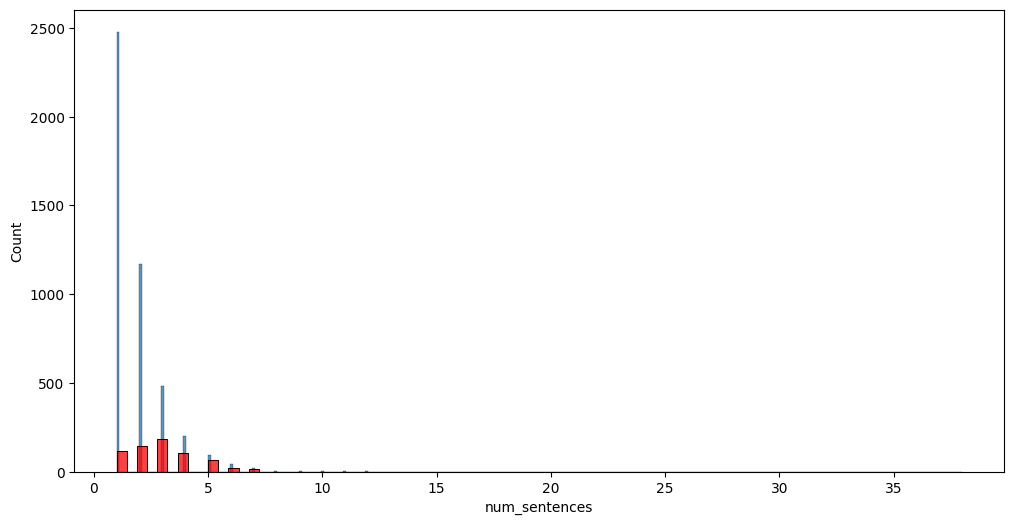

In [40]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_sentences'])
sns.histplot(df[df['target']==1]['num_sentences'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

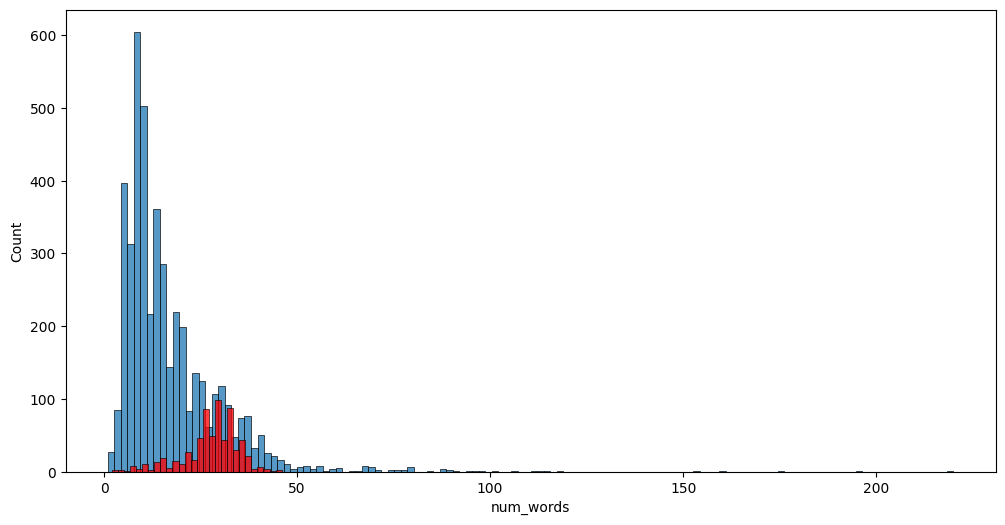

In [41]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

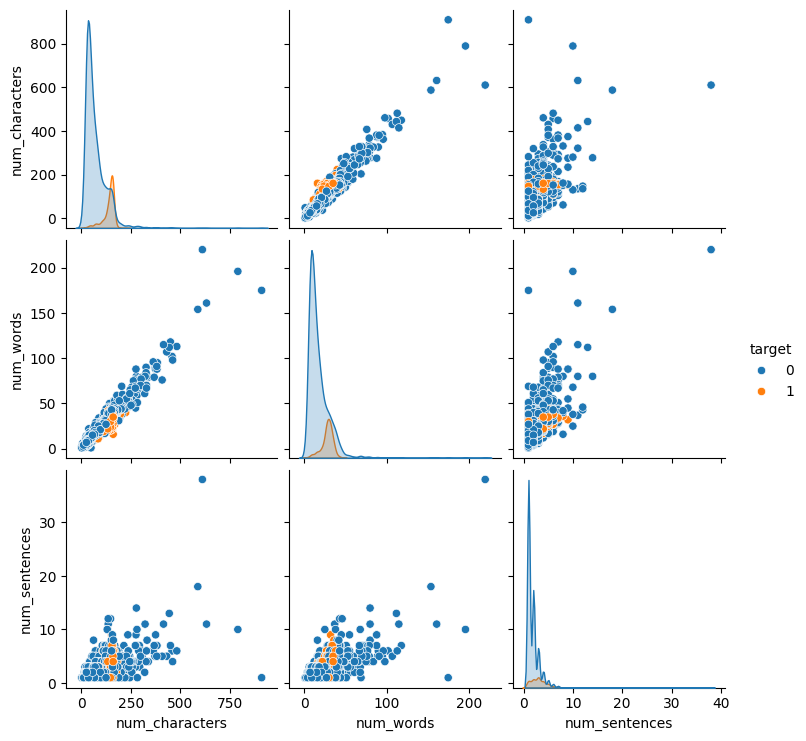

In [42]:
sns.pairplot(df,hue='target')

In [43]:
#

# DATA PREPROCESSING 

-LOWERCASE 


-TOKENIZATION


-REMOVING SPECIAL CHARACTERS


-REMOVING STOP WORDS AND PUNCTUATIONS



-STEMMING

In [44]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
nltk.download('stopwords')
ps=PorterStemmer()
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)
transformed_text=transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")
print(transformed_text)
    

gon na home soon want talk stuff anymor tonight k cri enough today


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\owner's\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [45]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [46]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('loving')

'love'

In [47]:
df['transformed_text']=df['text'].apply(transform_text)

C:\Users\owner's\AppData\Local\Temp\ipykernel_9928\4139466366.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text']=df['text'].apply(transform_text)


In [48]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [49]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [50]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [51]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

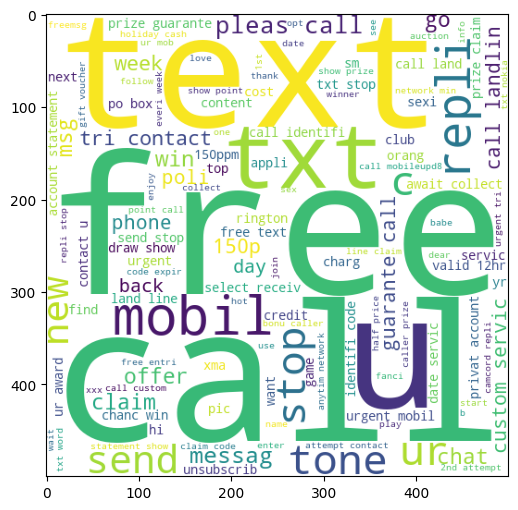

In [52]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [53]:
spam_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

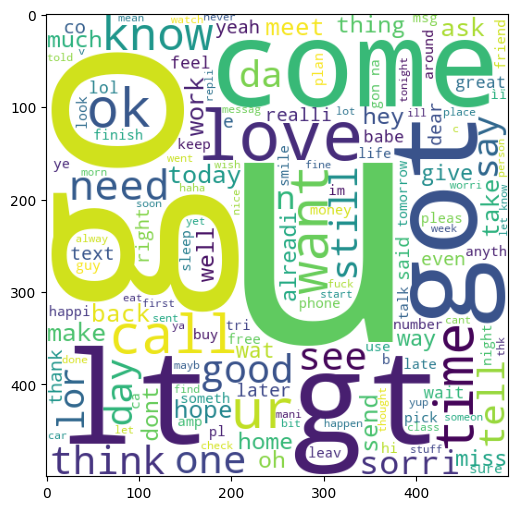

In [54]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [55]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [56]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [57]:
len(spam_corpus)

9939

In [58]:
pip install collections

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement collections (from versions: none)
ERROR: No matching distribution found for collections


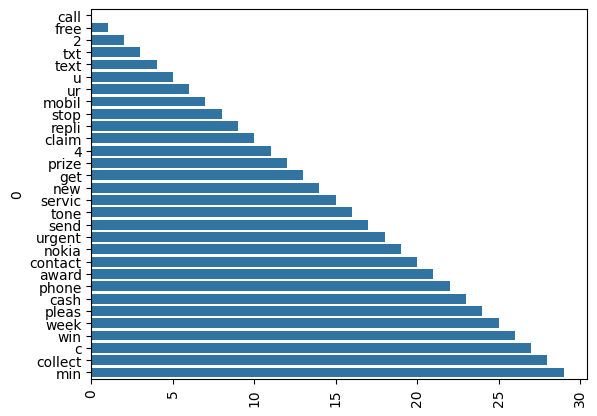

In [59]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0])
plt.xticks(rotation='vertical')
plt.show()

In [60]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [61]:
len(ham_corpus)

35404

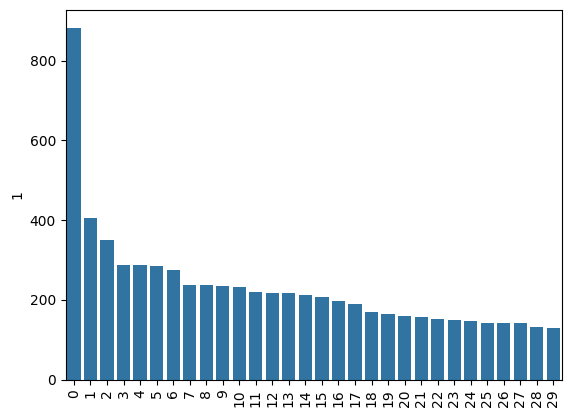

In [62]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [63]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# BUILDING THE MODEL

In [64]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [65]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [66]:
X.shape

(5169, 3000)

In [67]:
y=df['target'].values

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [70]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [71]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [72]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [73]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [74]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [75]:
!pip install xgboost

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier



In [77]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [79]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()

mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)

lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)

abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)

etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)



In [80]:
clfs={
    'SVC':svc,
    'KN':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost':abc,
    'BgC':bc,
    'ETC':etc,
    'GBDT':gbdt,
    
}

In [81]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    return accuracy,precision

In [82]:
train_classifier(svc,X_train,y_train,x_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [83]:
accuracy_scores=[]
precision_scores=[]
for name,clf in clfs.items():
    current_accuracy,current_precision=train_classifier(clf,X_train,y_train,x_test,y_test)
    print("For ",name)
    print("Accuracy: ",accuracy_scores)
    print("precision: ",precision_scores)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy:  []
precision:  []
For  KN
Accuracy:  [0.9758220502901354]
precision:  [0.9747899159663865]
For  NB
Accuracy:  [0.9758220502901354, 0.9052224371373307]
precision:  [0.9747899159663865, 1.0]
For  DT
Accuracy:  [0.9758220502901354, 0.9052224371373307, 0.9709864603481625]
precision:  [0.9747899159663865, 1.0, 1.0]
For  LR
Accuracy:  [0.9758220502901354, 0.9052224371373307, 0.9709864603481625, 0.9274661508704062]
precision:  [0.9747899159663865, 1.0, 1.0, 0.8118811881188119]
For  RF
Accuracy:  [0.9758220502901354, 0.9052224371373307, 0.9709864603481625, 0.9274661508704062, 0.9584139264990329]
precision:  [0.9747899159663865, 1.0, 1.0, 0.8118811881188119, 0.9702970297029703]


C:\Users\owner's\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy:  [0.9758220502901354, 0.9052224371373307, 0.9709864603481625, 0.9274661508704062, 0.9584139264990329, 0.9758220502901354]
precision:  [0.9747899159663865, 1.0, 1.0, 0.8118811881188119, 0.9702970297029703, 0.9829059829059829]
For  BgC
Accuracy:  [0.9758220502901354, 0.9052224371373307, 0.9709864603481625, 0.9274661508704062, 0.9584139264990329, 0.9758220502901354, 0.960348162475822]
precision:  [0.9747899159663865, 1.0, 1.0, 0.8118811881188119, 0.9702970297029703, 0.9829059829059829, 0.9292035398230089]
For  ETC
Accuracy:  [0.9758220502901354, 0.9052224371373307, 0.9709864603481625, 0.9274661508704062, 0.9584139264990329, 0.9758220502901354, 0.960348162475822, 0.9584139264990329]
precision:  [0.9747899159663865, 1.0, 1.0, 0.8118811881188119, 0.9702970297029703, 0.9829059829059829, 0.9292035398230089, 0.8682170542635659]
For  GBDT
Accuracy:  [0.9758220502901354, 0.9052224371373307, 0.9709864603481625, 0.9274661508704062, 0.9584139264990329, 0.9758220502901354, 0.9

In [84]:
performance_df=pd.DataFrame({'Algorithm':clfs.keys(),'precision':precision_scores,'Accuracy':accuracy_scores})
performance_df.sort_values('precision',ascending=False)


,Algorithm,precision,Accuracy
1,KN,1.000000,0.905222
2,NB,1.000000,0.970986
5,RF,0.982906,0.975822
0,SVC,0.974790,0.975822
8,ETC,0.974576,0.974855
4,LR,0.970297,0.958414
6,AdaBoost,0.929204,0.960348
9,GBDT,0.919192,0.946809
7,BgC,0.868217,0.958414
3,DT,0.811881,0.927466


In [85]:
performance_df1=pd.melt(performance_df,id_vars="Algorithm")


In [86]:
performance_df1

,Algorithm,variable,value
0,SVC,precision,0.974790
1,KN,precision,1.000000
2,NB,precision,1.000000
3,DT,precision,0.811881
4,LR,precision,0.970297
5,RF,precision,0.982906
6,AdaBoost,precision,0.929204
7,BgC,precision,0.868217
8,ETC,precision,0.974576
9,GBDT,precision,0.919192


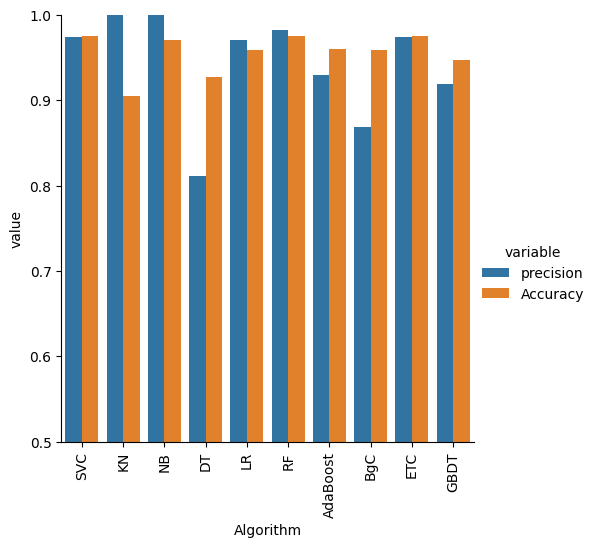

In [87]:
sns.catplot(x="Algorithm",y="value",hue="variable",data=performance_df1,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation="vertical")
plt.show()

In [88]:
temp_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores})
temp_df.sort_values('Precision_max_ft_3000',ascending=False)

,Algorithm,Accuracy_max_ft_3000,Precision_max_ft_3000
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
6,AdaBoost,0.960348,0.929204
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217
3,DT,0.927466,0.811881


In [89]:
new_df=performance_df.merge(temp_df,on='Algorithm')

In [90]:
new_df_scaled=new_df.merge(temp_df,on='Algorithm')

In [91]:
temp_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [92]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,precision,Accuracy,Accuracy_max_ft_3000_x,Precision_max_ft_3000_x,Accuracy_max_ft_3000_y,Precision_max_ft_3000_y,Accuracy_num_chars,Precision_num_chars
0,SVC,0.974790,0.975822,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
1,KN,1.000000,0.905222,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
2,NB,1.000000,0.970986,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
3,DT,0.811881,0.927466,0.927466,0.811881,0.927466,0.811881,0.927466,0.811881
4,LR,0.970297,0.958414,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297
5,RF,0.982906,0.975822,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
6,AdaBoost,0.929204,0.960348,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204
7,BgC,0.868217,0.958414,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217
8,ETC,0.974576,0.974855,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
9,GBDT,0.919192,0.946809,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192


In [93]:
svc=SVC(kernel="sigmoid",gamma=1.0,probability=True)
mnb=MultinomialNB()
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
from sklearn.ensemble import VotingClassifier

In [94]:
voting=VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting='soft')

In [95]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [96]:
y_pred=voting.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [97]:
estimators=[('svm',svc),('nb',mnb),('et',etc)]
final_estimator=RandomForestClassifier()

In [98]:
from sklearn.ensemble import StackingClassifier

In [99]:
clf=StackingClassifier(estimators=estimators,final_estimator=final_estimator)

In [100]:
clf.fit(X_train,y_train)
y_pred=clf.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9806576402321083
Precision 0.946969696969697


In [101]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [102]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
X_train=["Sample text 1","Sample text 2","Sample text 3"]
y_train=[0,1,0]
tfidf=TfidfVectorizer(lowercase=True,stop_words='english')
X_train_tfidf=tfidf.fit_transform(X_train)
mnb=MultinomialNB()
mnb.fit(X_train_tfidf,y_train)
with open('vectorizer.pkl','wb') as vectorizer_file:
    pickle.dump(tfidf,vectorizer_file)
with open('model.pkl','wb') as model_file:
    pickle.dump(mnb,model_file)